## Linear Regression with Stochastic Gradient Descent 

This notebook would like to connect linear regression model to neural network. In the lecture, we mentioned three key steps in neural network: neural network structures, loss function and optimization. Therefore, we will approach linear regression as neural network. Single-Variable Linear Regression can be formulated as a very simple network: a one-input one-output model. The model can predict the target value y from the input value x.  

## Agenda

1. Generating a toy dataset
2. Neural Network Structures
3. Loss Function
4. Optimization
5. Summary

## Part 1: Generating a toy dataset

In this example, the targets label will be generated from a function $f$ and additive Gaussian noise sampled from $N(0,0.2)$ which is the normal distribution with mean 0 and variance 0.2. The function $f$ will be a simple one which linear regression can learn, i.e., $f(x)=2x$. Then, the target value is $2x+N(0,0.2)$

20 inputs samples $x$ will be sampled from the uniform distribution between 0 and 1, and then generate the target output values $y$ by the process described above. The inputs and target values are ploted in the figure

In [1]:
%matplotlib inline

import numpy as np 
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns 

np.random.seed(seed=888)

In [2]:
# sampled from a uniform distribution between 0 and 1
x = np.random.uniform(0, 1, 20)

# Generate the target values y from x with small gaussian noise 

# without noise.
f = lambda x: x * 2.5

# Create the targets y with some gaussian noise
noise_variance = 0.2  
# Gaussian noise error for each sample in x
noise = np.random.randn(x.shape[0]) * noise_variance
# Create targets y
train_y = f(x) + noise

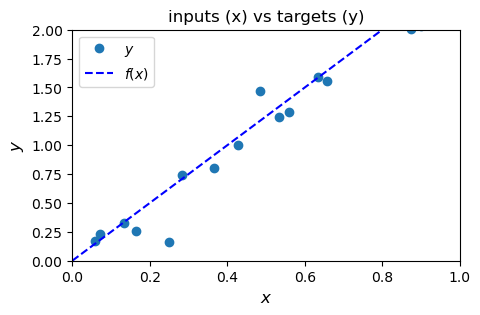

In [11]:
# Plot the target y versus the input x
plt.figure(figsize=(5, 3))
plt.plot(x, train_y, 'o', label='$y$')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.axis((0, 1, 0, 2))
plt.title('inputs (x) vs targets (y)')
plt.legend(loc=2)
plt.show()
#

## Part 2: Neural network structure

The network is trying to learn the mapping from input x to target y. The transformation here would be the input $x$ multiply the wegiht $w$ to generate the predicted output $\hat{y}$. The predicted  $\hat{y}$ should be as close as possible to the ground-truth $y$. Here, for simplicity, we ignore the bias term. The simple linear regression can be represented graphically:


<img src="../notebook_imgs/graph_linearregression.jpg" width="40%">

In [4]:
def nn(x, w):
    """Output function predicted y = x * w"""
    return x * w

The above model/structure represents the infinite function space which is parameterized by $w$. We need to find the best model. Or we can ask: how can we evaluate each model in that infinite function space. To answer that, we need to evaluate each function, i.e., loss function, over all samples. 

## Part 3: Loss function

We will optimize the model by tuning parameter $w$ so that the mean squared error (MSE) along all samples is minimized.

For regression problem, we usually use the mean squared error defined as $ J = \frac{1}{N}\sum_{i=1}^{N}||y_i-\hat{y}_i||^2$ where N is the number of samples in the training set. Therefore, the optimization goal is: 

$argmin_w\frac{1}{N}\sum_{i=1}^{N}||y_i-\hat{y}_i||^2$ . 

In [5]:
def loss(y_bar, y):
    """MSE loss function"""
    return np.mean((y_bar - y)**2)

we can also show the loss curve as below. The loss curve show the loss values under different parameters. A shown below, the value $w=2.5$ is at the bottom. And the value is the same slope that we choose for $f(x)$. 

This function here is convex so that there is the global optimal point. 


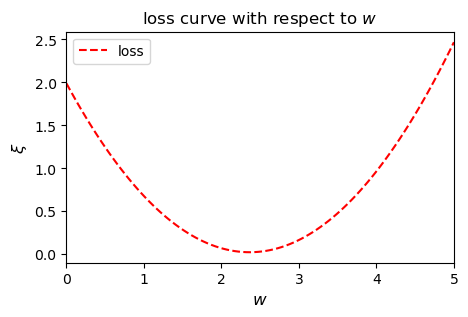

In [12]:
# Plot the loss vs the given weight w

# Vector of weights for which we want to plot the loss
ws = np.linspace(0, 5, num=100)  # weight values
# loss for each weight in ws
loss_ws = np.vectorize(lambda w: loss(nn(x, w) , train_y))(ws)

# Plot
plt.figure(figsize=(5, 3))
plt.plot(ws, loss_ws, 'r--', label='loss')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('loss curve with respect to $w$')
plt.xlim(0, 5)
plt.legend()
plt.show()
#

## Part 4: Optimization

For a simple loss function like in this example, you can see easily what the optimal weight should be. However, in practice the error surface can be quite complex with many hills and valleys, or have a high dimensionality (each parameter adds a new dimension). This is why we use [optimization techniques](https://en.wikipedia.org/wiki/Mathematical_optimization) like gradient descent to find the minimum of the error function.

### Gradient descent

One optimization algorithm commonly used to train neural networks is the [gradient descent](http://en.wikipedia.org/wiki/Gradient_descent) algorithm. The gradient descent algorithm works by taking the [gradient](http://en.wikipedia.org/wiki/Gradient) ([derivative](http://en.wikipedia.org/wiki/Derivative)) of the loss function $\xi$ with respect to the parameters at a specific position on this loss function, and updates the parameters in the direction of the negative gradient (down along the loss function).
The parameter $w$ is iteratively updated by taking steps proportional to the negative of the gradient:
$$
w(k+1) = w(k) - \Delta w=w(k) - \alpha \frac{\partial J}{\partial w}
$$

where $J$ is the loss function. 

With $\alpha$ the learning rate, which is how big of a step you take along the gradient, and ${\partial J}/{\partial w}$ the gradient of the loss function $J$ with respect to the weight $w$. For each sample $i$ this gradient can be splitted according to the [chain rule](http://en.wikipedia.org/wiki/Chain_rule) into:

$$
\frac{\partial J_i}{\partial w} = \frac{\partial J_i}{\partial \hat{y}_i} \frac{\partial \hat{y}_i}{\partial w}
$$

Where $J_i$ is the squared error loss, so the ${\partial J_i}/{\partial \hat{y}_i}$ term can be written as:

$$
\frac{\partial J_i}{\partial \hat{y}_i} = \frac{\partial (y_i - \hat {y}_i)^2}{\partial \hat{y}_i} = - 2 (y_i - \hat{y}_i) = 2 (\hat{y}_i - y_i)
$$

And since $\hat{y}_i = x_i \cdot w$ we can write ${\partial \hat{y}_i}/{\partial w}$ as:

$$
\frac{\partial \hat{y}_i}{\partial w} = \frac{\partial (x_i \cdot w)}{\partial w} = x_i
$$

So the full update function $\Delta w$ for sample $i$ will become:

$$
\Delta w = \alpha \cdot \frac{\partial J_i}{\partial w} = \alpha \cdot 2 x_i (\hat{y}_i - y_i)
$$

In the batch processing, we just add up all the gradients for each sample:

$$
\Delta w = \alpha * 2 * \frac{1}{N} \sum_{i=1}^{N} x_i (\hat{y}_i - y_i)
$$

The gradient descent algorithm is typically initialised by starting with random initial parameters. After initiating these parameters we can start updating these parameters with $\Delta w$ until convergence. The learning rate needs to be tuned separately as a hyperparameter for each neural network.

The gradient ${\partial J}/{\partial w}$ is implemented by the `gradient(w, x, y)` function. $\Delta w$ is computed by the `delta_w(w_k, x, y, learning_rate)`. The loop below performs 4 iterations of gradient descent while printing out the parameter value and current loss.


In [9]:
def gradient(w, x, y):
    """Gradient function. (Remember that hat y = nn(x, w) = x * w)
    y is the ground-truth value
    """
    
    return 2 * x * (nn(x, w) - y)


def delta_w(w_k, x, y, learning_rate):
    """Update function delta w"""
    return learning_rate * np.mean(gradient(w_k, x, y))


# Initial weight parameter
w = np.random.rand()
# Set the learning rate
learning_rate = 0.9

# Perform the gradient descent updates, and print the weights and loss:
nb_of_iterations = 4  # number of gradient descent updates
w_loss = [(w, loss(nn(x, w), train_y))] # Keep track of weight and loss values
for i in range(nb_of_iterations):
    dw = delta_w(w, x, train_y, learning_rate)  # Delta w update
    w = w - dw  # Update the current weight parameter
    w_loss.append((w, loss(nn(x, w), train_y)))  # Save weight and loss

# Print the final w, and loss
for i in range(0, len(w_loss)):
    print(f'w({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')

w(0): 0.4962 	 loss: 1.2514
w(1): 1.6784 	 loss: 0.1901
w(2): 2.1123 	 loss: 0.0470
w(3): 2.2716 	 loss: 0.0278
w(4): 2.3301 	 loss: 0.0252


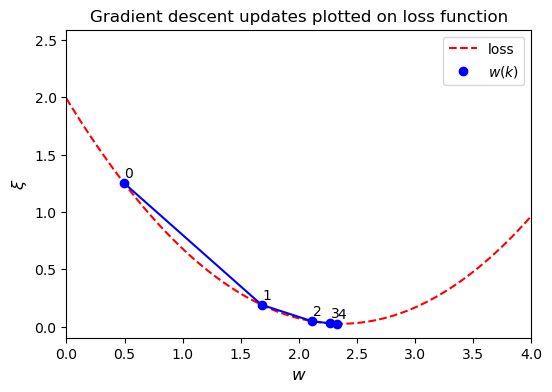

In [13]:
# Visualise the gradient descent updates
plt.figure(figsize=(6, 4))
plt.plot(ws, loss_ws, 'r--', label='loss')  # Loss curve
# Plot the updates
for i in range(0, len(w_loss)-1):
    w1, c1 = w_loss[i]
    w2, c2 = w_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.05, f'${i}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.05, f'${i+1}$')
# Show figure
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('Gradient descent updates plotted on loss function')
plt.xlim(0, 4)
plt.legend(loc=1)
plt.show()

## Part 5: Summary

In this notebook, we can see how single variable linear regression can be approached as neural network. Compared to linear regression, neural network typically: 

1. Have multiple layers (multi-dimension)and multiple nodes in each layer

2. Each node has a bias term

3. Non-linear activation functions

4. The error curve can be quite complex with many hills and valleys (local minimums), or have a high dimensionality (each parameter adds a new dimension). It is not as easy as convex optimization. 

### Reference:

https://github.com/peterroelants/peterroelants.github.io/tree/main/notebooks/neural_net_implementation

